## 공정 데이터 분류

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
## 데이터 로드
fct_data = pd.read_csv('/content/SKTFLY/train.csv')
fct_apply = pd.read_csv('/content/SKTFLY/test.csv')

In [ ]:
print(fct_data.shape)
print(fct_apply.shape)
fct_data.isnull().sum()

(598, 2881)
(310, 2879)


PRODUCT_ID      0
Y_Class         0
Y_Quality       0
TIMESTAMP       0
LINE            0
             ... 
X_2871        499
X_2872        598
X_2873        598
X_2874        598
X_2875        598
Length: 2881, dtype: int64

In [ ]:
## 데이터 확인 및 타입별 분류
print(fct_data['PRODUCT_CODE'].unique())

fct_data_A = fct_data[fct_data['PRODUCT_CODE'] == 'A_31']
fct_data_TO = fct_data[(fct_data['PRODUCT_CODE'] == 'T_31')| (fct_data['PRODUCT_CODE'] == 'O_31')]
print(fct_data_A.shape)
print(fct_data_TO.shape)

['A_31' 'T_31' 'O_31']
(249, 2881)
(349, 2881)


In [ ]:
print(fct_data_A)

    PRODUCT_ID  Y_Class  Y_Quality         TIMESTAMP     LINE PRODUCT_CODE  \
0    TRAIN_000        1   0.533433   2022-06-13 5:14  T050304         A_31   
1    TRAIN_001        2   0.541819   2022-06-13 5:22  T050307         A_31   
2    TRAIN_002        1   0.531267   2022-06-13 5:30  T050304         A_31   
3    TRAIN_003        2   0.537325   2022-06-13 5:39  T050307         A_31   
4    TRAIN_004        1   0.531590   2022-06-13 5:47  T050304         A_31   
..         ...      ...        ...               ...      ...          ...   
583  TRAIN_583        0   0.522340   2022-09-05 8:34  T050304         A_31   
584  TRAIN_584        0   0.519519  2022-09-05 11:09  T010305         A_31   
585  TRAIN_585        0   0.515214  2022-09-05 11:17  T010306         A_31   
594  TRAIN_594        0   0.524022  2022-09-08 22:38  T050304         A_31   
595  TRAIN_595        0   0.521289  2022-09-08 22:47  T050304         A_31   

     X_1  X_2  X_3  X_4  ...  X_2866  X_2867  X_2868  X_2869  X

In [ ]:
## 타입별로 결측치 보간
answer = 0
drop_col_A = []
drop_col_TO = []
for idx in range(1,2876):
  column = 'X_' + str(idx)
  if fct_data_A[column].isnull().sum() >= 1:
    drop_col_A.append(column)
for idx in range(1,2876):
  column = 'X_' + str(idx)
  if fct_data_TO[column].isnull().sum() >= 1:
    drop_col_TO.append(column)

print(drop_col_A)
print(drop_col_TO)

['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17', 'X_18', 'X_19', 'X_20', 'X_21', 'X_22', 'X_23', 'X_24', 'X_25', 'X_26', 'X_27', 'X_28', 'X_29', 'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35', 'X_36', 'X_37', 'X_38', 'X_39', 'X_40', 'X_41', 'X_42', 'X_43', 'X_44', 'X_45', 'X_46', 'X_47', 'X_48', 'X_49', 'X_50', 'X_51', 'X_52', 'X_53', 'X_54', 'X_55', 'X_56', 'X_57', 'X_58', 'X_59', 'X_60', 'X_61', 'X_62', 'X_63', 'X_64', 'X_65', 'X_66', 'X_67', 'X_68', 'X_69', 'X_70', 'X_71', 'X_72', 'X_73', 'X_74', 'X_75', 'X_76', 'X_77', 'X_78', 'X_79', 'X_80', 'X_81', 'X_82', 'X_83', 'X_84', 'X_85', 'X_86', 'X_87', 'X_88', 'X_89', 'X_90', 'X_91', 'X_92', 'X_93', 'X_94', 'X_95', 'X_96', 'X_97', 'X_98', 'X_99', 'X_100', 'X_101', 'X_102', 'X_103', 'X_104', 'X_105', 'X_106', 'X_107', 'X_108', 'X_109', 'X_110', 'X_111', 'X_112', 'X_113', 'X_114', 'X_115', 'X_116', 'X_117', 'X_118', 'X_119', 'X_120', 'X_121', 'X_122', 'X_123', 

In [ ]:
fct_data_A = fct_data_A.drop(drop_col_A,axis = 1)
fct_data_TO = fct_data_TO.drop(drop_col_TO, axis = 1)

In [ ]:
fct_data_A.shape

(249, 248)

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
fct_data_A_data = fct_data_A.drop(['PRODUCT_ID', 'Y_Class', 'Y_Quality','TIMESTAMP','LINE','PRODUCT_CODE'],axis=1)
fct_data_A_label = fct_data_A['Y_Class']
print(fct_data_A_data.shape)


(249, 242)


In [ ]:
## 데이터 분리
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(fct_data_A_data,
                                                            fct_data_A_label,
                                                            test_size=0.3,
                                                            random_state=11)

In [ ]:
#from sklearn.preprocessing import MinMaxScaler

#sc = MinMaxScaler()
#scaled_X_train_A = sc.fit_transform(X_train_A)
#scaled_X_test_A = sc.fit_transform(X_test_A)

In [ ]:
### 의사결정나무
dt_clf = DecisionTreeClassifier(random_state=11, max_depth = 7, min_samples_leaf = 4)
dt_clf.fit(X_train_A, y_train_A)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, random_state=11)

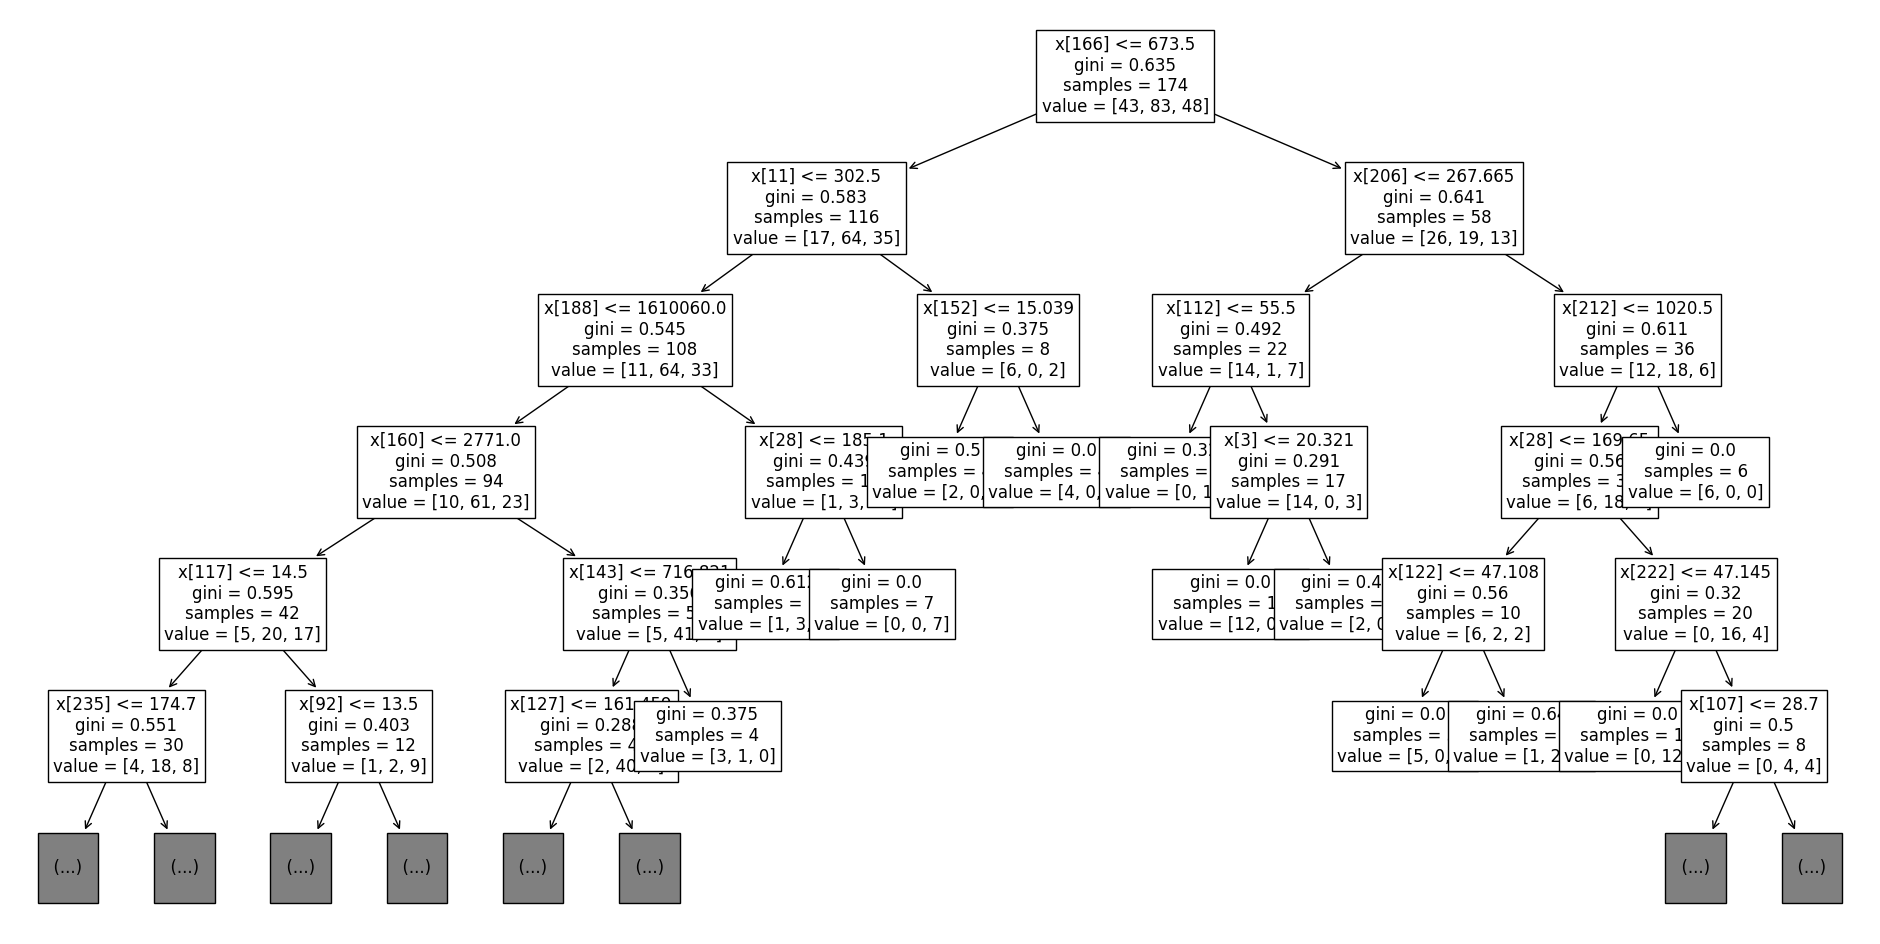

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(24,12))
plot_tree(dt_clf, max_depth=5, fontsize=12)
plt.show()

In [ ]:
pred_test = dt_clf.predict(X_test_A)
pred_train = dt_clf.predict(X_train_A)

In [ ]:
from sklearn.metrics import accuracy_score
print('test 정확도: {0:.4f}'.format(accuracy_score(y_test_A,pred_test)))
print('train 정확도: {0:.4f}'.format(accuracy_score(y_train_A,pred_train)))

test 정확도: 0.4000
train 정확도: 0.8161


In [ ]:
### XGBoost
from xgboost import XGBClassifier

# 객체 생성
model = XGBClassifier(max_depth = 4, n_estimators=100, learning_rate = 0.1)
xgb_model = model.fit(X_train_A, y_train_A,
                        eval_metric='logloss')

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


In [ ]:
y_pre_A =model.predict(X_test_A)
print(y_pre_A)

[2 1 1 1 0 2 0 0 1 2 2 1 1 0 1 1 0 1 2 1 1 2 1 1 1 0 1 1 1 2 2 0 0 1 1 2 1
 2 1 0 1 1 1 1 1 1 2 2 2 2 2 1 2 1 0 2 1 2 1 1 0 1 1 1 1 2 0 1 0 0 1 1 1 2
 1]


In [ ]:
from sklearn.metrics import accuracy_score
print('test 정확도: {0:.4f}'.format(accuracy_score(y_test_A,y_pre_A)))

test 정확도: 0.5467


In [ ]:
## 교차검증
scores = cross_val_score(model,X_train_A,y_train_A,
scoring='accuracy',cv=3)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.4655 0.4655 0.5517]
평균 검증 정확도: 0.4943


T와 O 데이터 분류

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
fct_data_TO_data = fct_data_TO.drop(['PRODUCT_ID', 'Y_Class', 'Y_Quality','TIMESTAMP','LINE','PRODUCT_CODE'],axis=1)
fct_data_TO_label = fct_data_TO['Y_Class']
print(fct_data_A_data.shape)

(249, 242)


In [ ]:
## 데이터 분리
X_train_TO, X_test_TO, y_train_TO, y_test_TO = train_test_split(fct_data_TO_data,
                                                            fct_data_TO_label,
                                                            test_size=0.3,
                                                            random_state=11)

In [ ]:
# 객체 생성
model = XGBClassifier(max_depth = 4, n_estimators=100, learning_rate = 0.1)
xgb_model = model.fit(X_train_TO, y_train_TO,
                        eval_metric='logloss')

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


In [ ]:
y_pre_TO =model.predict(X_test_TO)
print(y_pre_TO)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0]


In [ ]:
from sklearn.metrics import accuracy_score
print('test 정확도: {0:.4f}'.format(accuracy_score(y_test_TO,y_pre_TO)))

test 정확도: 0.8571


In [ ]:
## 교차검증
scores = cross_val_score(model, X_train_TO, y_train_TO,
scoring='accuracy',cv=3)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.7927 0.7901 0.8148]
평균 검증 정확도: 0.7992
